In [18]:
import pandas as pd

from src.graph.causal_graph import CausalGraph
from src.utilities import *
from src.data import NCMDataset
from src.training.train import *

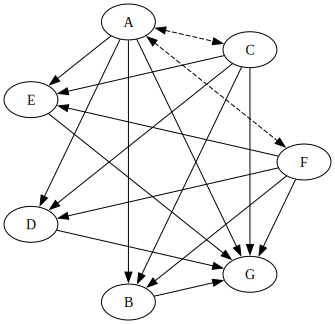

In [19]:
def create_expanded_sfm(X, Z_cols, W_cols, Y):
    nodes = [X,Y]
    de = [(X,Y),]
    be = []

    for Z in Z_cols:
        Z = Z.split()[0]
        nodes.append(Z)
        be.append((X,Z))
        for W in W_cols:
            W = W.split()[0]
            de.append((Z,W))
        de.append((Z,Y))

    for W in W_cols:
        W = W.split()[0]
        nodes.append(W)
        de.append((X,W))
        de.append((W,Y))
    return CausalGraph(nodes=nodes, directed_edges=de, bidirected_edges=be)

sfm = create_expanded_sfm('A', ['C','F'], ['B','D','E'], 'G')
# TODO: CHECK ACYCLIC
sfm.plot(2)

In [20]:
df = pd.read_csv('data/compas-scores.csv')
df.head(10)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
5,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-03-26,Risk of Recidivism,1,Low,2013-03-26
6,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-11-30,Risk of Recidivism,1,Low,2013-11-30
7,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-02-19,Risk of Recidivism,6,Medium,2014-02-19
8,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,3,Low,2013-08-30,Risk of Recidivism,4,Low,2013-08-30
9,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,1,Low,2014-03-16,Risk of Recidivism,1,Low,2014-03-16


In [21]:
# Load the CSV file with your data:
df = pd.read_csv('data/compas-scores.csv')
# Which features in your data are continuous?
# Equivalently, which features are neither categorical nor discrete?
categorical = ['race', 'age_cat', 'r_charge_degree', 'sex', 'score_text']

# Now define which columns of your data correspond to each node in your graph:
assignments = {
    'A': ['race'],
    'B': ['juv_fel_count', 'juv_misd_count', 'juv_other_count'],
    'C': ['age'],
    'D': ['priors_count'],
    'E': ['r_charge_degree'],
    'F': ['sex'],
    'G': ['score_text']
}

# Process data & assignments
my_data = process_data_assignments(df, assignments, sfm, categorical)
my_model = get_ncm(sfm, assignments=assignments)


It is okay to exclude features from the model but they will not be used in the causal analysis.


/Users/Hanita/causal/ci2-fairness-ncm/src/utilities.py:55: UserWarning: The following features were not assigned to any variable: {'r_charge_desc', 'r_jail_out', 'c_days_from_compas', 'decile_score', 'c_charge_desc', 'screening_date', 'r_days_from_arrest', 'is_violent_recid', 'c_jail_out', 'id', 'vr_case_number', 'dob', 'type_of_assessment', 'r_offense_date', 'v_score_text', 'r_jail_in', 'v_type_of_assessment', 'c_case_number', 'c_offense_date', 'first', 'days_b_screening_arrest', 'num_vr_cases', 'age_cat', 'last', 'num_r_cases', 'c_charge_degree', 'name', 'is_recid', 'vr_charge_degree', 'compas_screening_date', 'v_screening_date', 'c_arrest_date', 'r_case_number', 'decile_score.1', 'vr_offense_date', 'vr_charge_desc', 'c_jail_in', 'v_decile_score'}
  warnings.warn('The following features were not assigned to any variable: {}'.format(unassigned_features), UserWarning)


In [22]:
# TODO: Translate NODE values into DATA feature heads
_ = train_ncm(my_model, my_data['train'], num_epochs=3)

Epoch 1/3, Loss: 0.0971
Epoch 2/3, Loss: 0.0767
Epoch 3/3, Loss: 0.0744


In [23]:
print_accuracy('B', my_model, my_data['train'], my_data['test'])

		 energy-based: 0.9866
		 js-divergence: 0.9994
Final train accuracy for B: 0.9354
		 energy-based: 0.9866
		 js-divergence: 0.9991
Final test accuracy  for B: 0.9349


In [24]:
print_accuracy('A', my_model, my_data['train'], my_data['test'])
print_accuracy('G', my_model, my_data['train'], my_data['test'])

		 energy-based: 0.9589
		 js-divergence: 0.9763
Final train accuracy for A: 0.9342
		 energy-based: 0.9610
		 js-divergence: 0.9796
Final test accuracy  for A: 0.9349
		 energy-based: 0.9407
		 js-divergence: 0.9748
Final train accuracy for G: 0.9338
		 energy-based: 0.9345
		 js-divergence: 0.9592
Final test accuracy  for G: 0.9288
